In [15]:
import psycopg2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="wb_s2_embeddings",
    user="s2",
    password="wb@s2"
)

from pgvector.psycopg2 import register_vector

register_vector(conn)

# Fetch embeddings in smaller batches
def fetch_embeddings(offset, limit):
    cur = conn.cursor()
    cur.execute("SELECT embedding FROM embeddings_openai OFFSET %s LIMIT %s", (offset, limit))
    rows = cur.fetchall()
    cur.close()
    return rows

# Convert the embeddings to a NumPy array
embeddings = []
offset = 0
limit = 10000  # Fetch 10 embeddings at a time
total_embeddings = 1000000


while offset < total_embeddings:
    print("Fetching embeddings from {} to {}, of {}".format(offset, offset + limit,total_embeddings),end="\r")
    rows = fetch_embeddings(offset, limit)

    for row in rows:
        embeddings.append(np.array(row[0], dtype=np.float32))
    
    offset += limit

embeddings = np.array(embeddings)




In [20]:
# Perform clustering using K-Means
print(f"Clustering {len(embeddings)} embeddings")
kmeans = KMeans(n_init='auto' , n_clusters=4, verbose=True, random_state=0).fit(embeddings)
labels = kmeans.labels_



Clustering 112897 embeddings
Initialization complete
Iteration 0, inertia 40927.7890625.
Iteration 1, inertia 23470.3515625.
Iteration 2, inertia 23184.265625.
Iteration 3, inertia 23110.953125.
Iteration 4, inertia 23085.541015625.
Iteration 5, inertia 23072.0390625.
Iteration 6, inertia 23062.13671875.
Iteration 7, inertia 23054.01171875.
Iteration 8, inertia 23046.107421875.
Iteration 9, inertia 23037.873046875.
Iteration 10, inertia 23030.23046875.
Iteration 11, inertia 23022.5703125.
Iteration 12, inertia 23012.005859375.
Iteration 13, inertia 22988.4921875.
Iteration 14, inertia 22959.45703125.
Iteration 15, inertia 22948.015625.
Iteration 16, inertia 22940.388671875.
Iteration 17, inertia 22934.52734375.
Iteration 18, inertia 22929.896484375.
Iteration 19, inertia 22926.744140625.
Iteration 20, inertia 22924.84765625.
Iteration 21, inertia 22923.73046875.
Iteration 22, inertia 22923.02734375.
Iteration 23, inertia 22922.66015625.
Iteration 24, inertia 22922.423828125.
Iteration 

In [21]:
# Reduce the dimensionality of the embeddings using t-SNE
print("Reducing dimensionality of embeddings")
tsne = TSNE(n_components=2, random_state=0,verbose=True)
embeddings_tsne = tsne.fit_transform(embeddings)


Reducing dimensionality of embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 112897 samples in 0.029s...
[t-SNE] Computed neighbors for 112897 samples in 323.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 112897
[t-SNE] Computed conditional probabilities for sample 2000 / 112897
[t-SNE] Computed conditional probabilities for sample 3000 / 112897
[t-SNE] Computed conditional probabilities for sample 4000 / 112897
[t-SNE] Computed conditional probabilities for sample 5000 / 112897
[t-SNE] Computed conditional probabilities for sample 6000 / 112897
[t-SNE] Computed conditional probabilities for sample 7000 / 112897
[t-SNE] Computed conditional probabilities for sample 8000 / 112897
[t-SNE] Computed conditional probabilities for sample 9000 / 112897
[t-SNE] Computed conditional probabilities for sample 10000 / 112897
[t-SNE] Computed conditional probabilities for sample 11000 / 112897
[t-SNE] Computed conditional probabilities for sample 12000 / 112

Visualizing


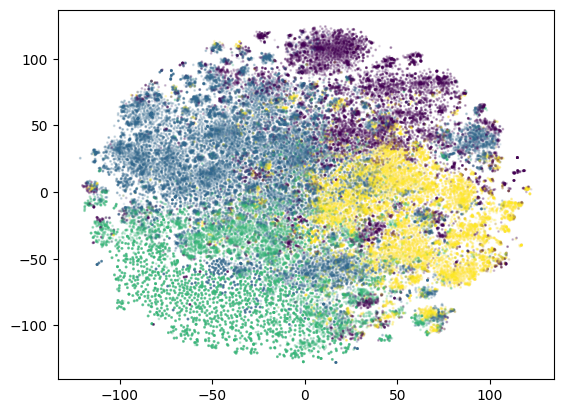

In [22]:
print("Visualizing")
# Visualize the clusters using Matplotlib
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, s=1,alpha=.1)

plt.show()

In [23]:
#export to .py
!jupyter nbconvert --to script viz.ipynb

[NbConvertApp] Converting notebook viz.ipynb to script
[NbConvertApp] Writing 1736 bytes to viz.py
